In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data from CSV
data = pd.read_csv("heart.csv")

# Define feature variables (X) and target variable (y)
X = data.drop("target", axis=1)
y = data["target"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(
    "Logistic Regression Classification Report:\n",
    classification_report(y_test, y_pred_logistic),
)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=49)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(
    "Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf)
)

Logistic Regression Accuracy: 0.7951219512195122
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

KNN Accuracy: 0.8341463414634146
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

Naive Bayes Accuracy: 0.8
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.71      0.78       102
           1       0.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [16]:
# Define dictionaries to hold metrics
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
metrics["Model"].append("Logistic Regression")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_logistic))
report_logistic = classification_report(y_test, y_pred_logistic, output_dict=True)
metrics["Precision"].append(report_logistic["1"]["precision"])
metrics["Recall"].append(report_logistic["1"]["recall"])
metrics["F1-Score"].append(report_logistic["1"]["f1-score"])

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
metrics["Model"].append("KNN")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_knn))
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
metrics["Precision"].append(report_knn["1"]["precision"])
metrics["Recall"].append(report_knn["1"]["recall"])
metrics["F1-Score"].append(report_knn["1"]["f1-score"])

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
metrics["Model"].append("Naive Bayes")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_nb))
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
metrics["Precision"].append(report_nb["1"]["precision"])
metrics["Recall"].append(report_nb["1"]["recall"])
metrics["F1-Score"].append(report_nb["1"]["f1-score"])

# Random Forests
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
metrics["Model"].append("Random Forest")
metrics["Accuracy"].append(accuracy_score(y_test, y_pred_rf))
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
metrics["Precision"].append(report_rf["1"]["precision"])
metrics["Recall"].append(report_rf["1"]["recall"])
metrics["F1-Score"].append(report_rf["1"]["f1-score"])

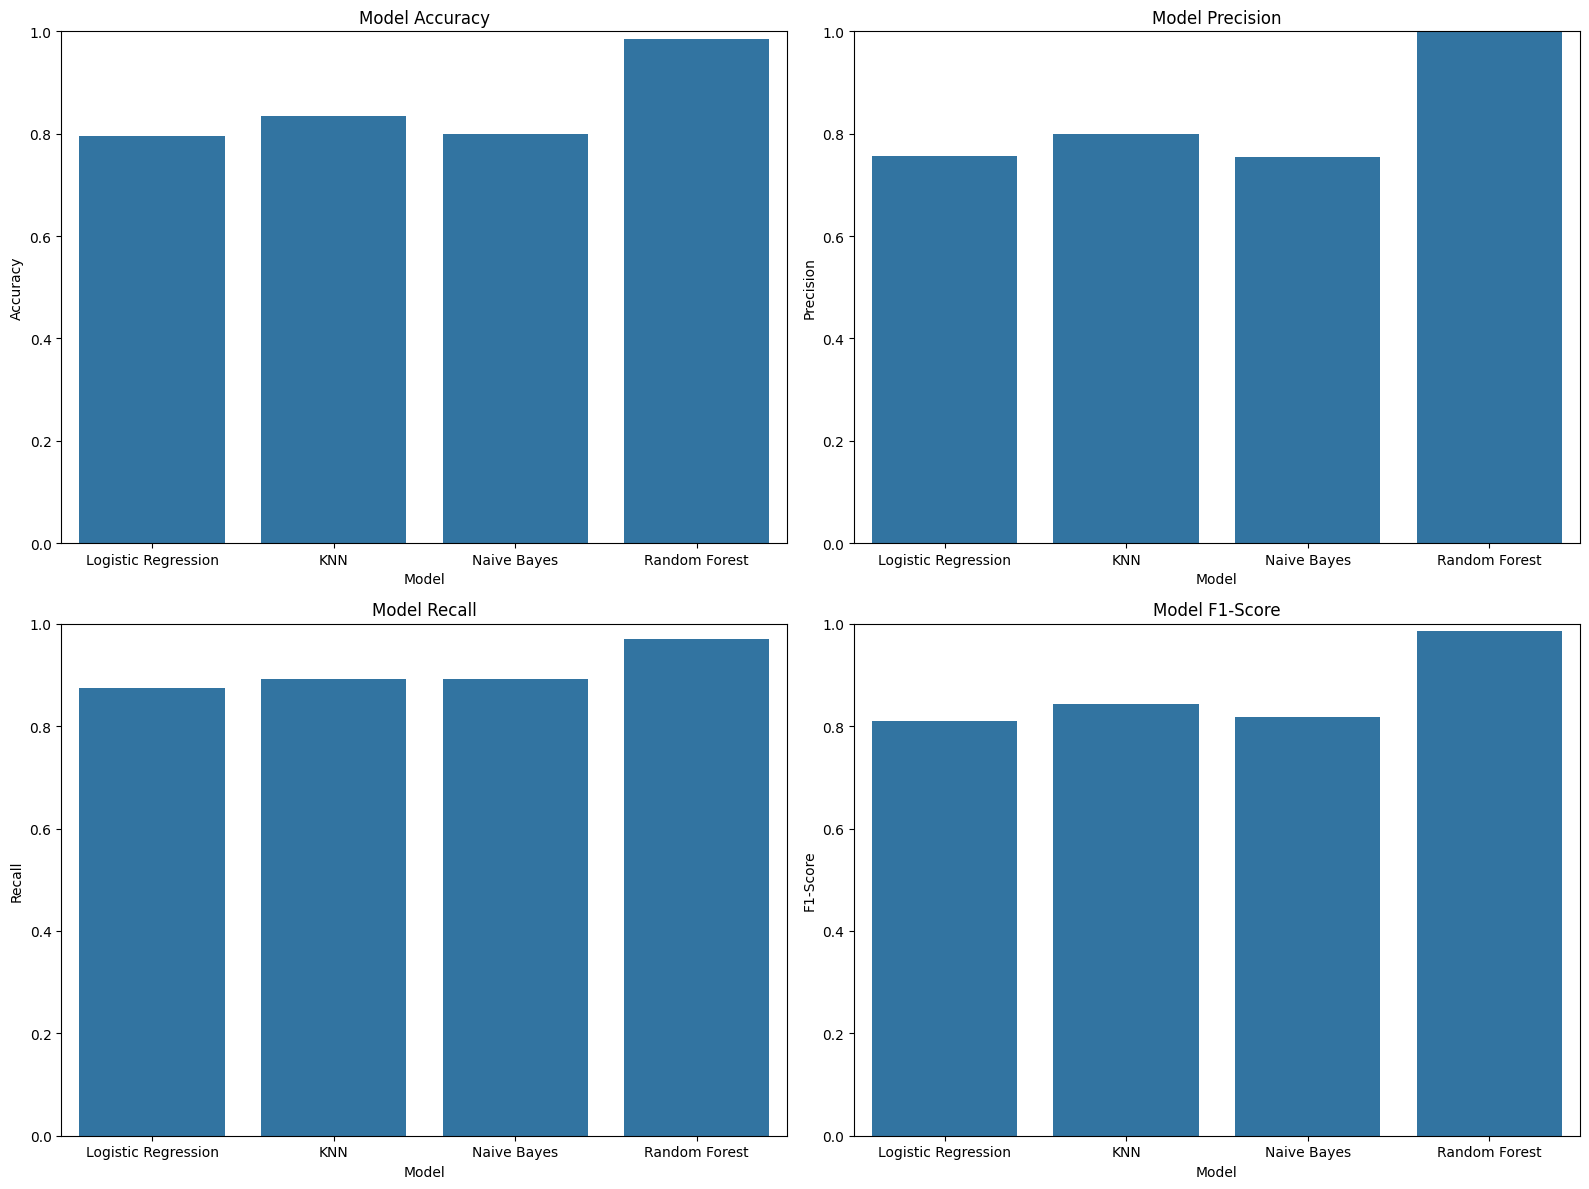

In [17]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting Accuracy, Precision, Recall, and F1-Score
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy
sns.barplot(x="Model", y="Accuracy", data=metrics_df, ax=axes[0, 0])
axes[0, 0].set_title("Model Accuracy")
axes[0, 0].set_ylim(0, 1)

# Precision
sns.barplot(x="Model", y="Precision", data=metrics_df, ax=axes[0, 1])
axes[0, 1].set_title("Model Precision")
axes[0, 1].set_ylim(0, 1)

# Recall
sns.barplot(x="Model", y="Recall", data=metrics_df, ax=axes[1, 0])
axes[1, 0].set_title("Model Recall")
axes[1, 0].set_ylim(0, 1)

# F1-Score
sns.barplot(x="Model", y="F1-Score", data=metrics_df, ax=axes[1, 1])
axes[1, 1].set_title("Model F1-Score")
axes[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

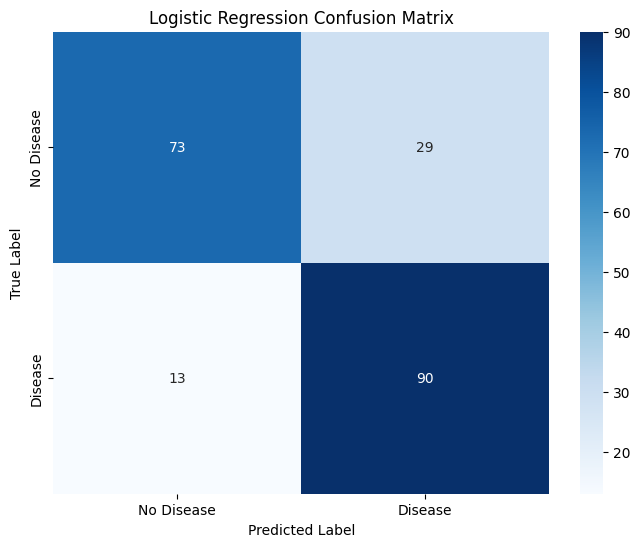

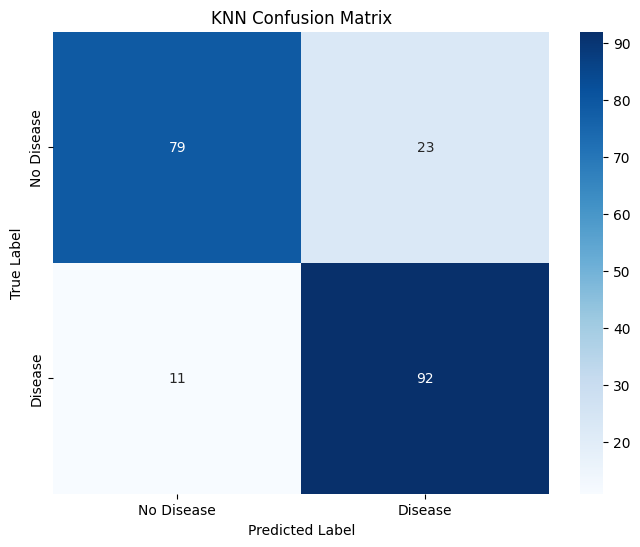

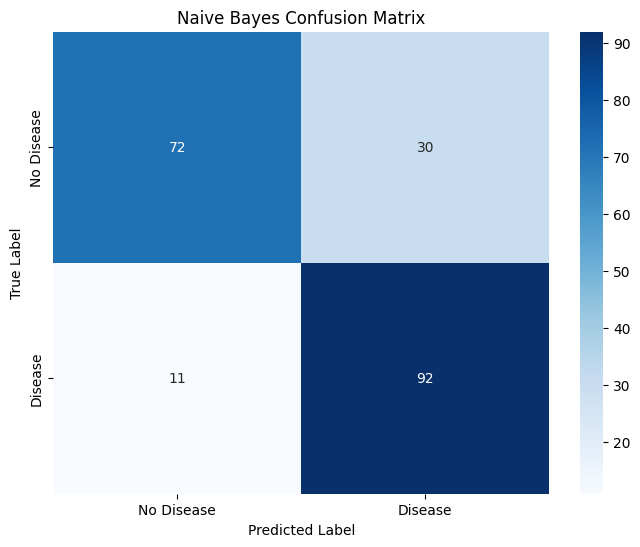

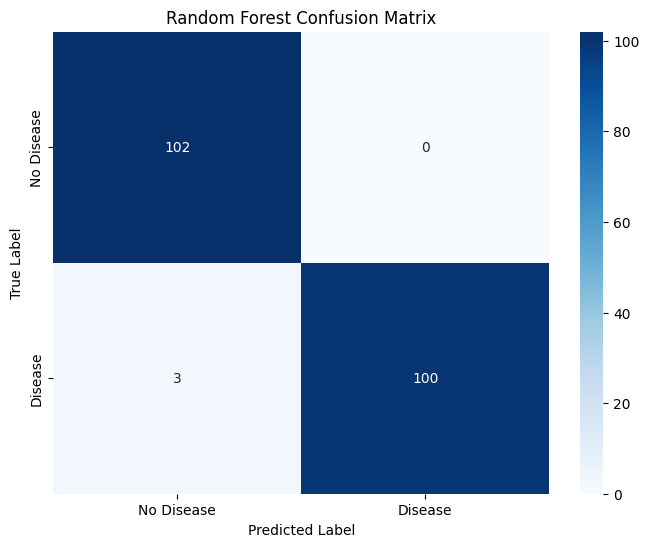

In [18]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["No Disease", "Disease"],
        yticklabels=["No Disease", "Disease"],
    )
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Confusion Matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred_logistic), "Logistic Regression")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), "KNN")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nb), "Naive Bayes")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Random Forest")

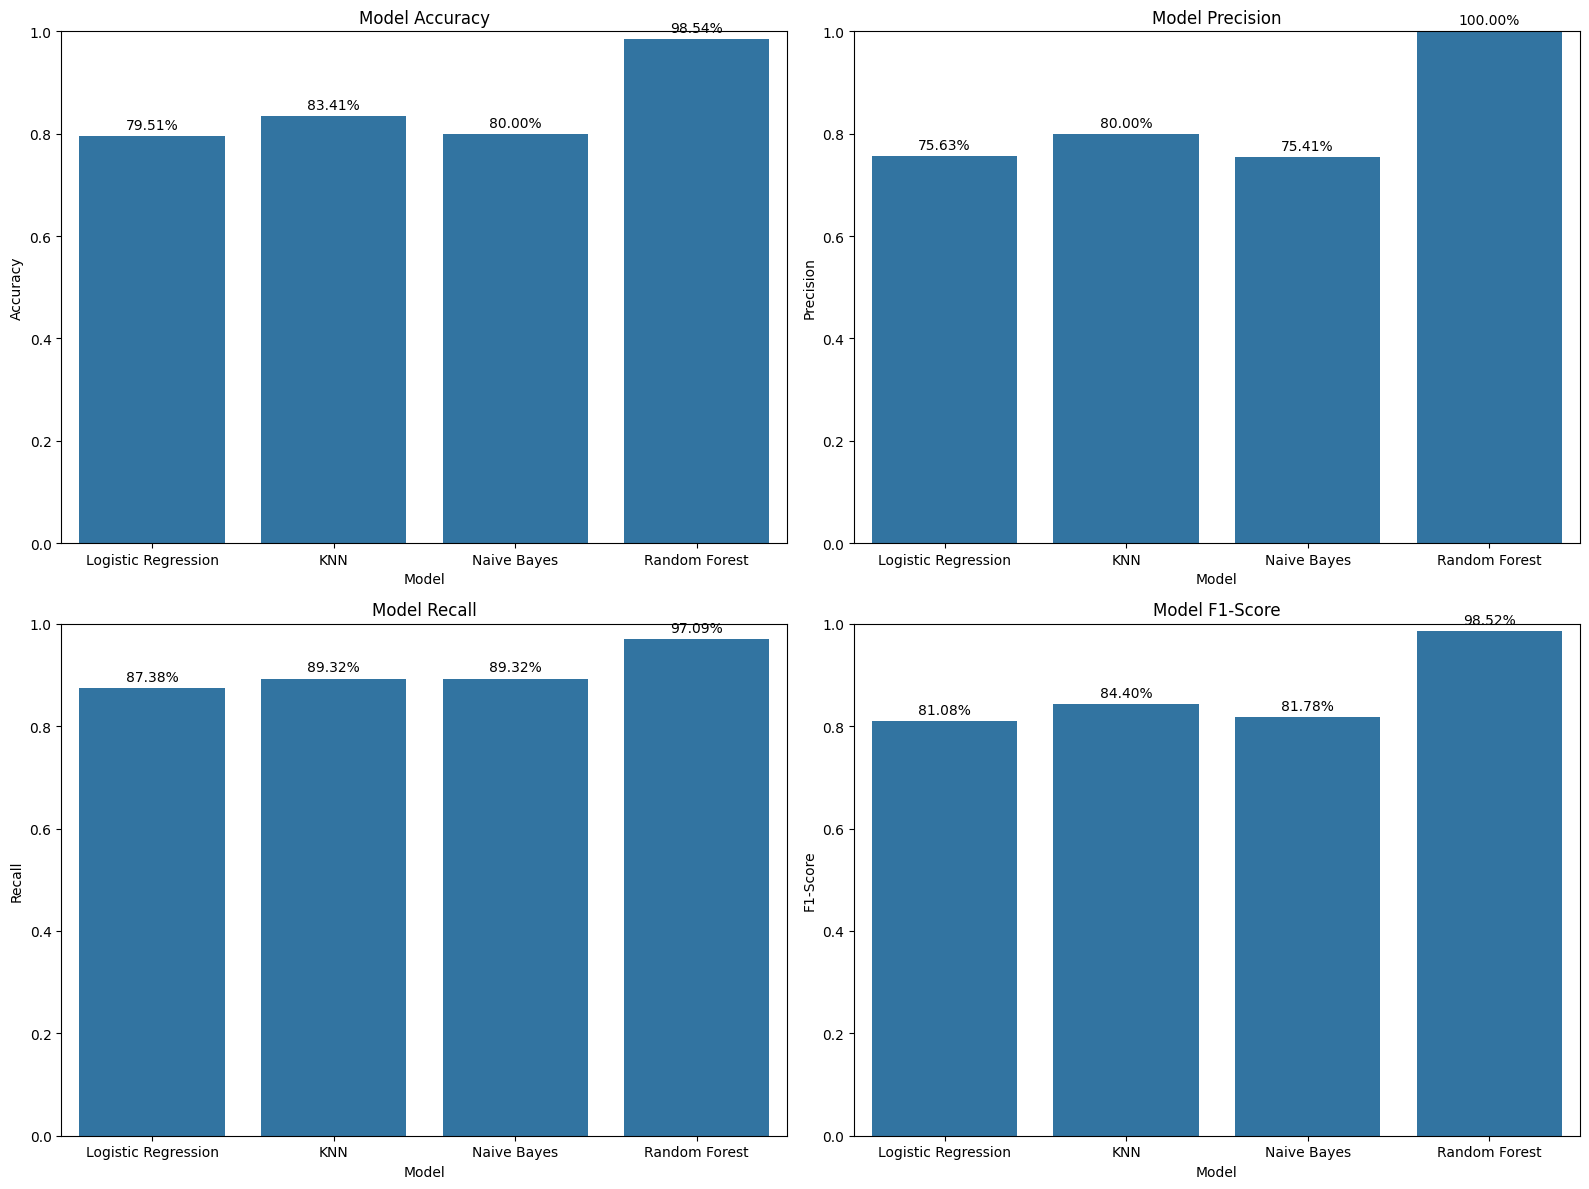

In [19]:
# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting Accuracy, Precision, Recall, and F1-Score with annotations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


def plot_bar_chart(ax, metric_name):
    sns.barplot(x="Model", y=metric_name, data=metrics_df, ax=ax)
    ax.set_title(f"Model {metric_name}")
    ax.set_ylim(0, 1)

    # Annotate bars with percentages
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height()*100:.2f}%",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 8),
            textcoords="offset points",
        )


# Accuracy
plot_bar_chart(axes[0, 0], "Accuracy")

# Precision
plot_bar_chart(axes[0, 1], "Precision")

# Recall
plot_bar_chart(axes[1, 0], "Recall")

# F1-Score
plot_bar_chart(axes[1, 1], "F1-Score")

plt.tight_layout()
plt.show()